                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2014-09-29  100.589996  100.690002   98.040001   99.620003   93.514290   
2014-10-06   99.949997  102.379997   98.309998  100.730003   94.556244   
2014-10-13  101.330002  101.779999   95.180000   97.669998   91.683792   
2014-10-20   98.320000  105.489998   98.220001  105.220001   98.771042   
2014-10-27  104.849998  108.040001  104.699997  108.000000  101.380676   

               Volume  
Date                   
2014-09-29  142718700  
2014-10-06  280258200  
2014-10-13  358539800  
2014-10-20  358532900  
2014-10-27  220230600  


C:\Users\Hari\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  self._init_dates(dates, freq)
C:\Users\Hari\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  self._init_dates(dates, freq)
C:\Users\Hari\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  self._init_dates(dates, freq)


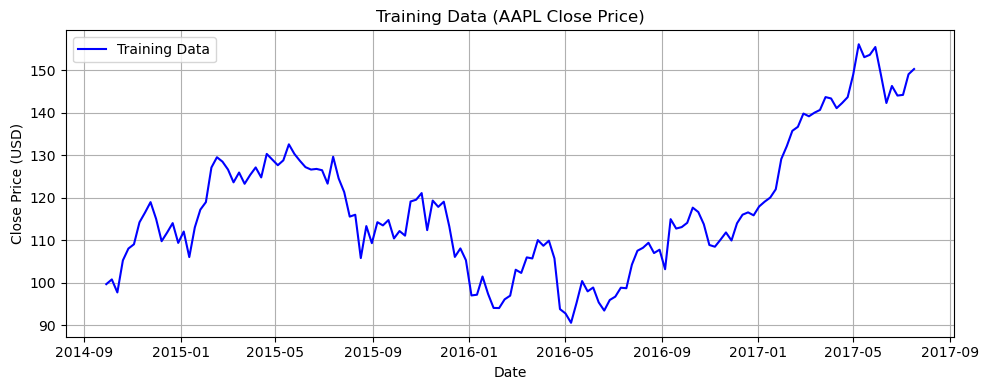

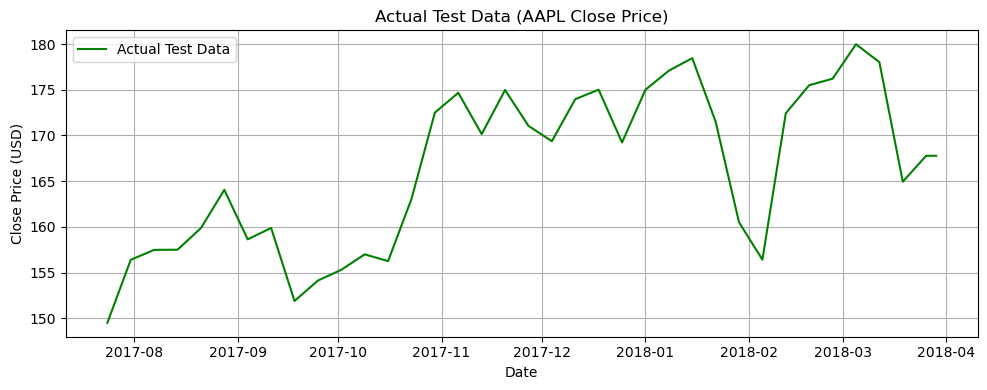

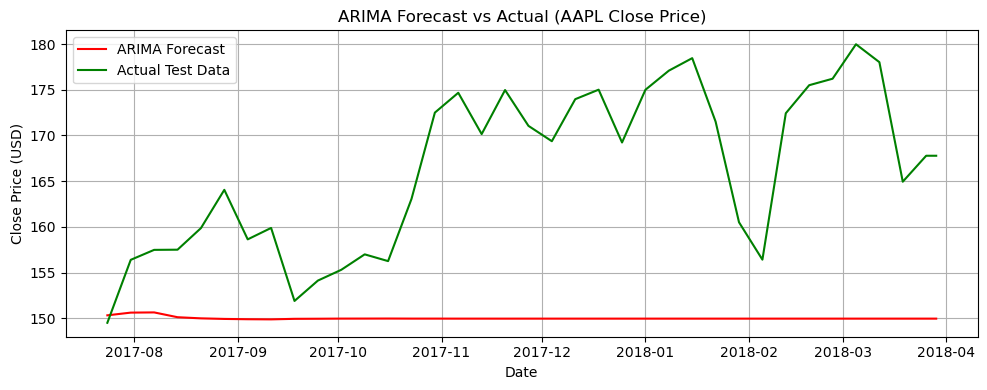

RMSE: 18.50


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

# Load the dataset (ensure the date parsing and indexing is done correctly)
df = pd.read_csv('C:\\Users\\Hari\\Desktop\\Exp07\\AAPL.csv', parse_dates=['Date'], index_col='Date')

# Display the first few rows of the dataset
print(df.head())

# Use the 'Close' price for the time series
time_series = df['Close']

# Optional: Resample to monthly frequency (if needed for smoothing)
# time_series = time_series.resample('M').mean()

# Split the data into training and testing sets (80% training, 20% testing)
train_size = int(len(time_series) * 0.8)
train, test = time_series[:train_size], time_series[train_size:]

# Fit ARIMA model (you can adjust the order as needed)
model = ARIMA(train, order=(5, 1, 0))  # Tune (p, d, q) for best fit
model_fit = model.fit()

# Forecasting
forecast = model_fit.forecast(steps=len(test))

# Plot training data
plt.figure(figsize=(10, 4))
plt.plot(train, label='Training Data', color='blue')
plt.title('Training Data (AAPL Close Price)')
plt.xlabel('Date')
plt.ylabel('Close Price (USD)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Plot actual test data
plt.figure(figsize=(10, 4))
plt.plot(test, label='Actual Test Data', color='green')
plt.title('Actual Test Data (AAPL Close Price)')
plt.xlabel('Date')
plt.ylabel('Close Price (USD)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Plot forecast vs actual
plt.figure(figsize=(10, 4))
plt.plot(test.index, forecast, label='ARIMA Forecast', color='red')
plt.plot(test, label='Actual Test Data', color='green')
plt.title('ARIMA Forecast vs Actual (AAPL Close Price)')
plt.xlabel('Date')
plt.ylabel('Close Price (USD)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Calculate RMSE (Root Mean Squared Error)
rmse = np.sqrt(mean_squared_error(test, forecast))
print(f'RMSE: {rmse:.2f}')
